<a href="https://colab.research.google.com/github/jassynavarro/CCMACLRL_EXERCISES_COM221/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [125]:
#put your answer here
df = pd.read_csv('iris.csv')

3. Visualize the dataset

In [126]:
# put your answer here
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [127]:
# Remove
df.drop(columns='Id', inplace=True)

In [128]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [130]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [131]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## Histogram

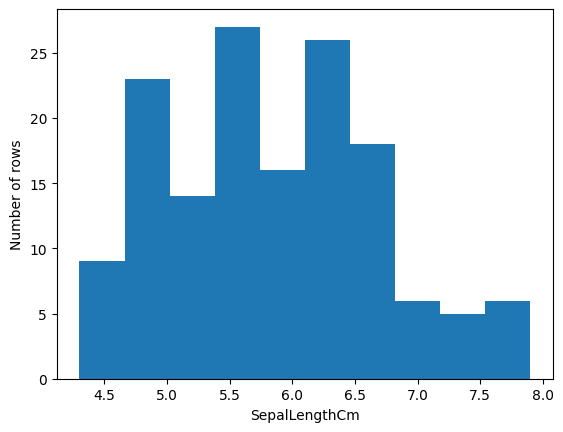

In [132]:
plt.hist(df['SepalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('Number of rows')
plt.show()

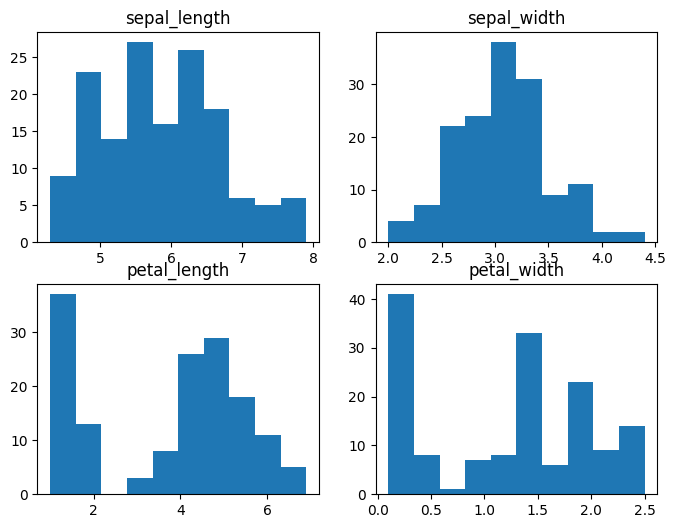

In [133]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0, 0].hist(df['SepalLengthCm'])
axs[0, 1].hist(df['SepalWidthCm'])
axs[1, 0].hist(df['PetalLengthCm'])
axs[1, 1].hist(df['PetalWidthCm'])

axs[0, 0].set_title('sepal_length')
axs[0, 1].set_title('sepal_width')
axs[1, 0].set_title('petal_length')
axs[1, 1].set_title('petal_width')

plt.show()

## Scatter Plot

In [134]:
colors = {'Iris-setosa': 'red',
          'Iris-virginica': 'violet',
          'Iris-versicolor': 'green'}

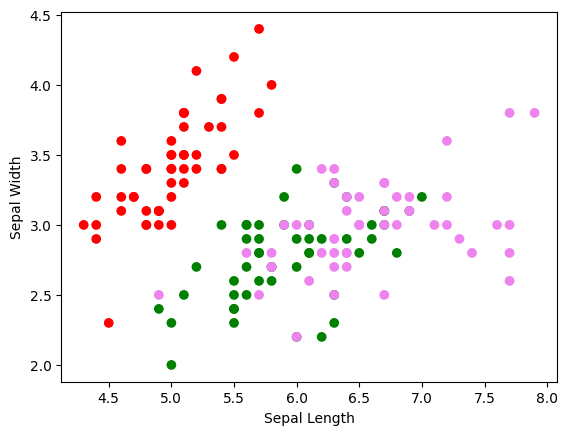

In [135]:
plt.scatter(df["SepalLengthCm"],
            df["SepalWidthCm"],
            c=df['Species'].map(colors))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

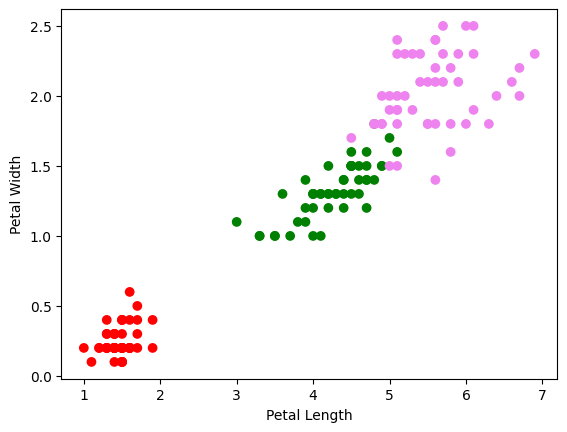

In [136]:
plt.scatter(df["PetalLengthCm"],
            df["PetalWidthCm"],
            c=df['Species'].map(colors))
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

4. Split the dataset into a training set and a testing set

In [140]:
# put your answer here

#Array of features
X = df.drop(columns=['Species']).values

#Array of labels
y = df['Species'].values

In [142]:
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [145]:
X.ndim

2

In [146]:
X.shape

(150, 4)

In [147]:
y.ndim

1

In [148]:
y.shape

(150,)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#X = feature
#y = label

(120, 4)
(120,)
(30, 4)
(30,)


In [151]:
print(X_train)

[[5.1 3.4 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.7 2.6 3.5 1. ]
 [5.4 3.7 1.5 0.2]
 [7.  3.2 4.7 1.4]
 [5.  3.3 1.4 0.2]
 [5.  3.5 1.6 0.6]
 [7.7 3.  6.1 2.3]
 [5.  3.5 1.3 0.3]
 [6.4 3.2 5.3 2.3]
 [5.8 2.7 5.1 1.9]
 [5.6 2.5 3.9 1.1]
 [5.1 3.5 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [6.5 2.8 4.6 1.5]
 [6.2 2.8 4.8 1.8]
 [5.9 3.  4.2 1.5]
 [6.7 3.3 5.7 2.1]
 [7.7 3.8 6.7 2.2]
 [5.4 3.4 1.7 0.2]
 [6.3 2.5 5.  1.9]
 [5.  3.2 1.2 0.2]
 [4.6 3.4 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.2 3.4 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.7 1. ]
 [5.1 2.5 3.  1.1]
 [5.9 3.  5.1 1.8]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.2 2. ]
 [6.5 3.  5.8 2.2]
 [6.9 3.1 4.9 1.5]
 [4.6 3.6 1.  0.2]
 [6.6 3.  4.4 1.4]
 [4.9 3.1 1.5 0.1]
 [6.7 3.  5.  1.7]
 [6.7 3.  5.2 2.3]
 [5.6 2.9 3.6 1.3]
 [6.3 3.4 5.6 2.4]
 [5.6 2.7 4.2 1.3]
 [6.1 3.  4.9 1.8]
 [6.3 2.3 4.4 1.3]
 [5.8 2.6 4.  1.2]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 5.4 2.1]
 [6.8 2.8 4.8 1.4]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.9 0.2]
 [5.2 2.7 3.

5. Train the model

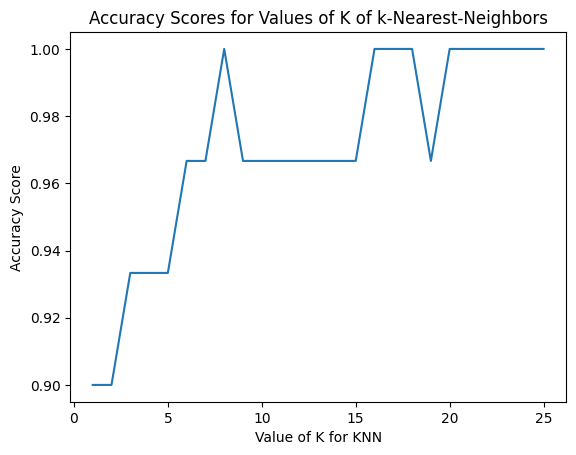

In [156]:
# put your answer here

#Experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    #Train the model
    knn.fit(X_train, y_train)

    #Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of K of k-Nearest-Neighbors')
plt.show()

6. Test the model

In [160]:
# put your answer here

knn = KNeighborsClassifier(n_neighbors=13)

#Train the model
knn.fit(X_train, y_train)

#Test the model
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

In [161]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[6,3,4,2]])

array(['Iris-versicolor'], dtype=object)